In [1]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import numpy as np
import cv2
from collections import Counter
from skimage.color import rgb2lab, deltaE_cie76
import os

%matplotlib inline

The type of this input is <class 'numpy.ndarray'>
Shape: (830, 550, 3)


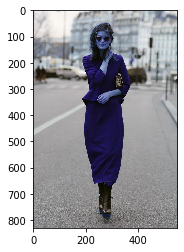

In [81]:
num='0017'
img = 'C:\\Users\\student\\trip_fashion\\dataset\\clothing-co-parsing\\photos\\'+num+'.jpg'
image = cv2.imread(img)
print("The type of this input is {}".format(type(image)))
print("Shape: {}".format(image.shape))
plt.imshow(image)

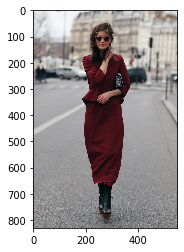

In [82]:
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [65]:
def RGB2HEX(color):
    return "#{:02x}{:02x}{:02x}".format(int(color[0]), int(color[1]), int(color[2]))

In [66]:
def get_image(image_path):
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    return image

In [67]:
def get_colors(image, number_of_colors, show_chart):
    
    modified_image = cv2.resize(image, (600, 400), interpolation = cv2.INTER_AREA)
    modified_image = modified_image.reshape(modified_image.shape[0]*modified_image.shape[1], 3)
    
    clf = KMeans(n_clusters = number_of_colors)
    labels = clf.fit_predict(modified_image)
    
    counts = Counter(labels)
    # sort to ensure correct color percentage
    counts = dict(sorted(counts.items()))
    
    center_colors = clf.cluster_centers_
    # We get ordered colors by iterating through the keys
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [RGB2HEX(ordered_colors[i]) for i in counts.keys()]
    rgb_colors = [ordered_colors[i] for i in counts.keys()]

    if (show_chart):
        plt.figure(figsize = (8, 6))
        plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    
    return rgb_colors

[array([235.48724363, 237.45432894, 238.78604595]),
 array([99.15534336, 89.03332967, 83.46855449]),
 array([40.45731575, 38.92301978, 39.38420466]),
 array([151.30492347, 143.02610727, 138.11079507]),
 array([184.35253832, 182.25329964, 180.15464277])]

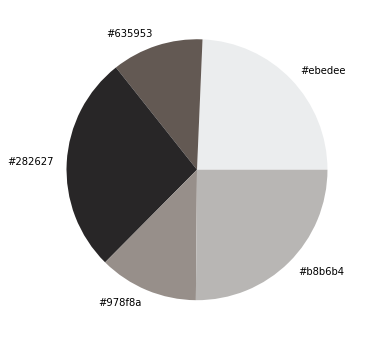

In [68]:
get_colors(get_image(img), 5, True)

# obj detection & color extraction

In [59]:
import cv2
import matplotlib.pyplot as plt
import cvlib as cv
from cvlib.object_detection import draw_bbox
import PIL.Image as pilimg
import numpy as np

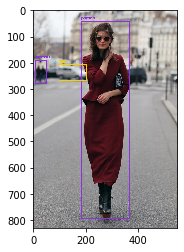

In [83]:
bbox, label, conf = cv.detect_common_objects(image)
output_image = draw_bbox(image, bbox, label, conf)
plt.imshow(output_image)
plt.show()

In [84]:
im = pilimg.open('C:\\Users\\student\\trip_fashion\\dataset\\clothing-co-parsing\\photos\\'+num+'.jpg')
pix = np.array(im)

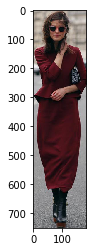

In [85]:
plt.imshow(pix[bbox[0][1]:bbox[0][3], bbox[0][0]:bbox[0][2]])

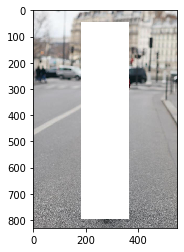

In [86]:
cloth = pix.copy()[bbox[0][1]:bbox[0][3], bbox[0][0]:bbox[0][2]]
pix[bbox[0][1]:bbox[0][3], bbox[0][0]:bbox[0][2]] = -1
plt.imshow(pix)

[array([65.34682228, 19.6437359 , 25.31771785]),
 array([152.85474003, 149.25824618, 148.06101143]),
 array([97.03526914, 60.29674017, 60.84372004]),
 array([129.28829565, 115.37991935, 112.73651166]),
 array([29.13409684, 15.27981195, 17.97110964]),
 array([183.97977445, 177.49162615, 173.06368179])]

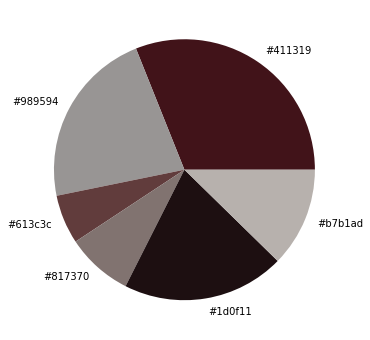

In [93]:
get_colors(cloth, 6, True)